#                                              Exploratory Data of Facebook Like analysis

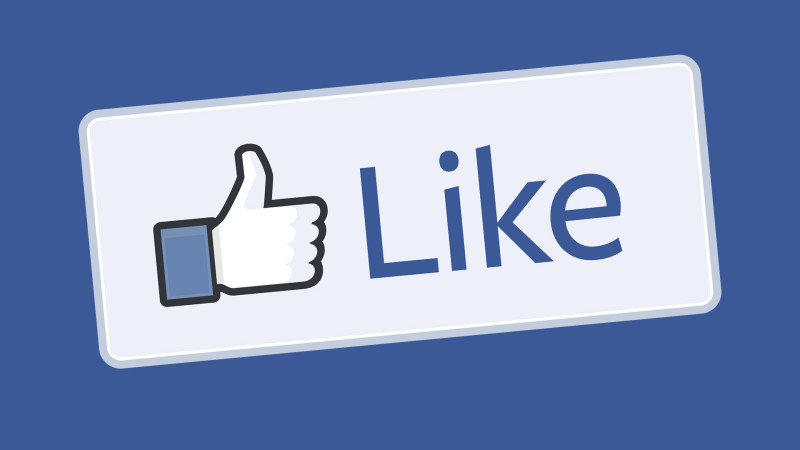

In [20]:
from IPython.display import Image
Image("fb.jpg")

### Below objectives have been performed in the process of EDA

Extract data from tsv file,clean and processing data.

Visulize not actively users count with different age groups.

Visulize facebook usage on Mobile and Desktop.

Visulize gender usage of facebook app over to desktop url.

Visulize facebook likes analysis with different age group and gender.

Visulize facebook received like analysis with different age group and gender.

Visulize top 10 users, doing facebook likes and receiving facebook likes.

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
%matplotlib inline
import pandas as pd

#Extract data from tsv file

df=pd.read_table('pseudo_facebook.tsv')
df.head(2)

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0


#### Clean & Processing Data

In [44]:
df['gender'].fillna(df['gender'].mode()[0],inplace=True)

Gender column has missing few values,It has been filled its most repeat value

In [17]:
ageOutliers=[]
O_indices=[]
q1=np.percentile(df['age'],25)
q3=np.percentile(df['age'],75)
IQR = (q3-q1)*1.5
ageOutliers=df[((df['age']>q3+IQR) | (df['age'] < q1-IQR))]
O_indices=ageOutliers.index
df1=df.drop(df.index[O_indices])

In [ ]:
In the process of de

###### Visulize not actively users count with different age groups.

Not actively Users:


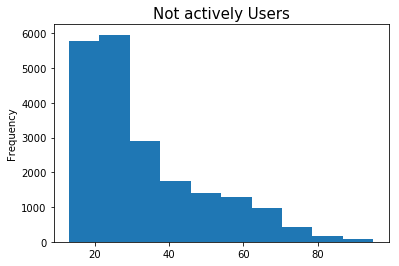

In [4]:
df1.reset_index(drop=True,inplace=True)
c=0
Indices = []
for index, row in df1.iterrows():
     if row['tenure']>30:
            if ((row['likes']==0) and (row['mobile_likes']==0)) and (row['www_likes']==0):
                c=c+1
                Indices.append(index)

df2=df1.ix[Indices]
df2.age.plot(kind='hist')
print("Not actively Users:")
plt.title("Not actively Users",fontsize=15)

In [5]:
df2=df1.drop(df1.index[Indices])
df2.reset_index(drop=True,inplace=True)

In [6]:
def age_group(row):
    if row['age']<20:
        return 20
    if row['age']>=20 and row['age']<30:
        return 30
    if row['age']>=30 and row['age']<40:
        return 40
    if row['age']>=40 and row['age']<60:
        return 60
    if row['age']>=60 and row['age']<80:
        return 80
    if row['age']>=80:
        return 100

In [7]:
df2['age_group']=df2.apply(lambda row: age_group(row),axis=1)

###### Visulize facebook usage on Mobile and Desktop

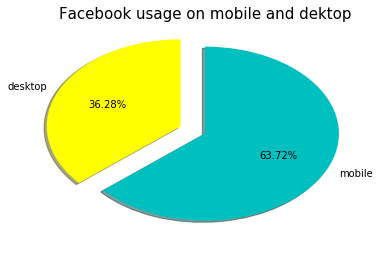

In [8]:
values=[df2.www_likes.sum()+df2.www_likes_received.sum(),df2.mobile_likes.sum()+df2.mobile_likes_received.sum()]
labels=['desktop','mobile']
explode = (0.2, 0)
colors = ['yellow', 'c']
plt.pie(values, colors=colors, labels=labels,autopct='%1.2f%%',shadow=True, startangle=90,explode=explode)
plt.title('Facebook usage on mobile and dektop',fontsize=15)

###### Visulize gender usage of facebook app over to desktop url.

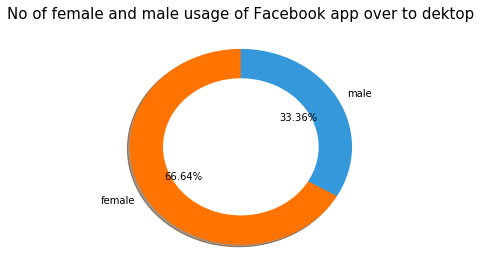

In [10]:
mobileOvertoDesktop_likes=df2[(df2['mobile_likes']>=df2['www_likes'])].groupby(['gender'])['mobile_likes'].sum()
explode = (0.2, 0)
colors = ["#FF7400", "#3498db"]
plt.pie(mobileOvertoDesktop_likes, labels=mobileOvertoDesktop_likes.index, autopct='%1.2f%%',shadow=True,colors=colors,startangle=90)
plt.title('No of female and male usage of Facebook app over to dektop',fontsize=15)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show()

###### Visulize facebook likes analysis  & facebook received like analysis with different age groups and gender.

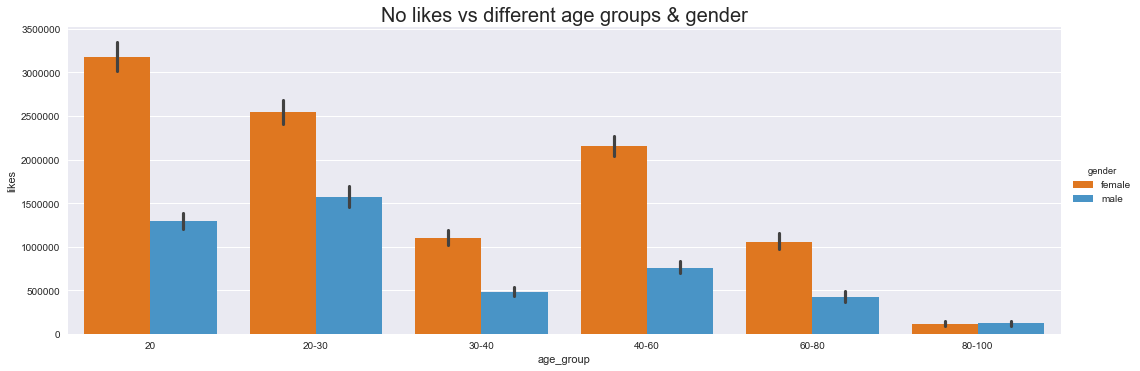

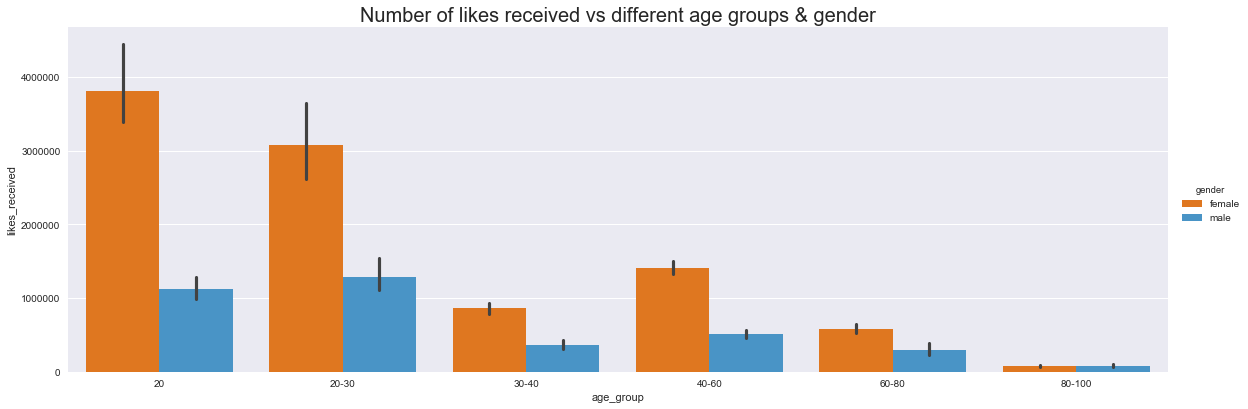

In [39]:
lp=sns.factorplot(y='likes',x='age_group',kind='bar',estimator=sum ,data=df2,hue='gender',size=5,aspect=3,palette=(["#FF7400", "#3498db"]))
plt.title("No likes vs different age groups & gender",fontsize=20)
lp.set_xticklabels(["20","20-30","30-40", "40-60","60-80","80-100"])
lrp=sns.factorplot(y='likes_received',x='age_group',kind='bar',estimator=sum ,data=df2,hue='gender',size=5.5,aspect=3,palette=(["#FF7400", "#3498db"]))
lrp.set_xticklabels(["20","20-30","30-40", "40-60","60-80","80-100"])
plt.title("Number of likes received vs different age groups & gender",fontsize=20)

###### Top 10 users vs likes,likes recevied and gender

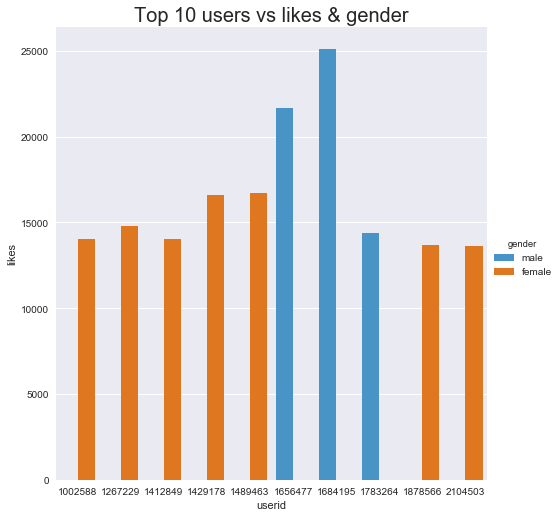

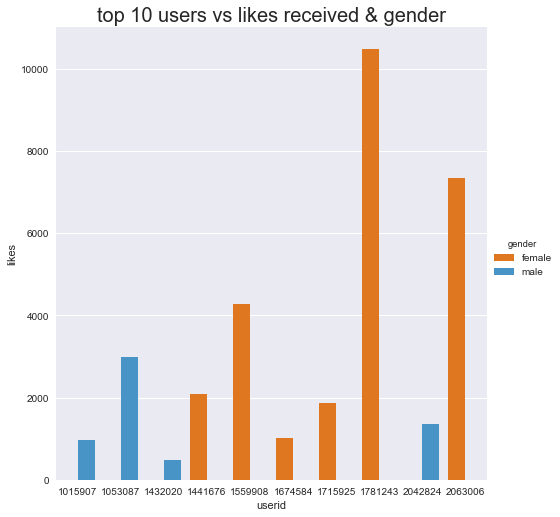

In [42]:
top10=pd.DataFrame(df2.sort_values(['likes'],ascending=False).head(10))
sns.factorplot(y='likes',x='userid',hue='gender',data=top10,size=7,kind='bar',palette=( ["#3498db","#FF7400"]))
plt.title("Top 10 users vs likes & gender",fontsize=20)
top10=pd.DataFrame(df2.sort_values(['likes_received'],ascending=False).head(10))
sns.factorplot(y='likes',x='userid',hue='gender',data=top10,size=7,kind='bar',palette=(["#FF7400","#3498db"]))
plt.title("top 10 users vs likes received & gender",fontsize=20)